## EDA --> Exploratory Data Analysis
### Data Loading
### Data Understanding --> Data Dictionary (Reference Document contains columns description)

In [1]:
import pandas as pd #Importing panda liabrary
import numpy as np  #Importing numpy liabrary
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings 
from matplotlib.pyplot import figure #Importing plot library
from difflib import SequenceMatcher #Importing Sequencematcher function to match word sequences for employee title
warnings.filterwarnings('ignore')
df=pd.read_csv('loan1.csv', encoding='latin-1') #Reading data set
df.describe() #Checking data set columns information overall

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Columns with null/NA values

In [2]:
df.isnull().sum()  #looking for columns with all null values
df1=df.dropna(thresh=(len(df)*0.75), axis=1)  #removing columns with more than 85% null values and storing dataframe to df1
df_Gradewise=df1.pivot_table(index=['grade'], columns=['loan_status'],values=['id'])
df1 = df1[~df1['loan_status'].isin(['Current'])] #The loan status with "Current" status is not considered in analysis
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
id                            38577 non-null int64
member_id                     38577 non-null int64
loan_amnt                     38577 non-null int64
funded_amnt                   38577 non-null int64
funded_amnt_inv               38577 non-null float64
term                          38577 non-null object
int_rate                      38577 non-null object
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title_original            38577 non-null object
emp_title                     38577 non-null object
emp_length                    37544 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null object
loan_sta

#### Checking 0 cells in each column

In [3]:
for i in df1:
    print(i)
    print((df[i]==0).sum())

    

id
0
member_id
0
loan_amnt
0
funded_amnt
0
funded_amnt_inv
129
term
0
int_rate
0
installment
0
grade
0
sub_grade
0
emp_title_original
0
emp_title
0
emp_length
0
home_ownership
0
annual_inc
0
verification_status
0
issue_d
0
loan_status
0
pymnt_plan
0
url
0
purpose
0
title
0
zip_code
0
addr_state
0
dti
183
delinq_2yrs
35405
earliest_cr_line
0
inq_last_6mths
19300
open_acc
0
pub_rec
37601
revol_bal
994
revol_util
0
total_acc
0
initial_list_status
0
out_prncp
38577
out_prncp_inv
38577
total_pymnt
16
total_pymnt_inv
165
total_rec_prncp
74
total_rec_int
71
total_rec_late_fee
37671
recoveries
35499
collection_recovery_fee
35935
last_pymnt_d
0
last_pymnt_amnt
74
last_credit_pull_d
0
collections_12_mths_ex_med
39661
policy_code
0
application_type
0
acc_now_delinq
39717
chargeoff_within_12_mths
39661
delinq_amnt
39717
pub_rec_bankruptcies
37339
tax_liens
39678


#### Dropping columns with 0

In [31]:
df2=df1.drop(columns=['tax_liens','delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','policy_code',
                      'collections_12_mths_ex_med','delinq_2yrs','pub_rec']) #Removing unnecessary columns

#### Segregation of variables into Continous & Categorical

In [5]:
cat_col=['id', 'member_id','term', 'grade', 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'annual_inc',
         'verification_status','issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title','zip_code',
         'addr_state', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util','total_acc', 
         'initial_list_status', 'out_prncp', 'out_prncp_inv','total_rec_prncp', 'total_rec_int','total_rec_late_fee',
         'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'application_type','pub_rec_bankruptcies']
cont_col=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','annual_inc','dti','inq_last_6mths', 'open_acc',
          'revol_bal', 'total_acc', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']

In [ ]:
#Univariate analysis & Outliers check

loan_amnt


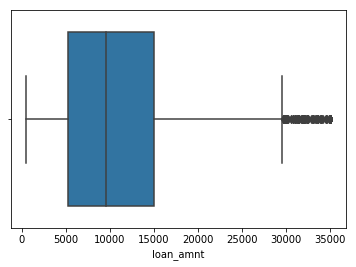

<Figure size 1296x720 with 0 Axes>

funded_amnt


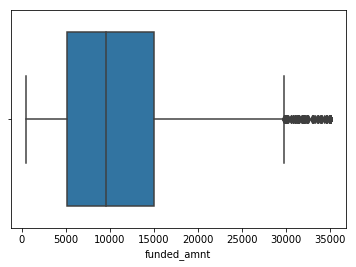

<Figure size 1296x720 with 0 Axes>

funded_amnt_inv


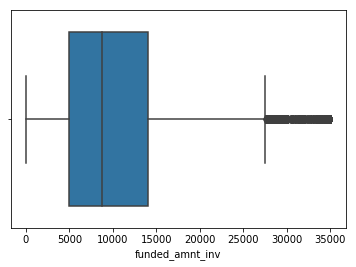

<Figure size 1296x720 with 0 Axes>

installment


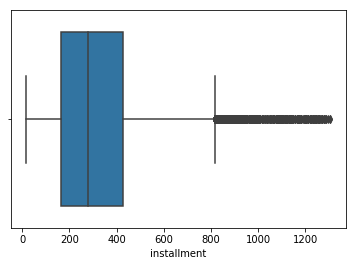

<Figure size 1296x720 with 0 Axes>

annual_inc


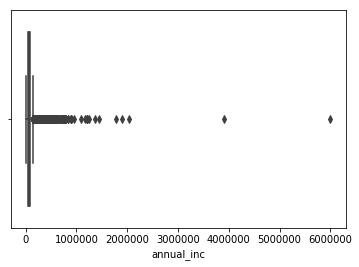

<Figure size 1296x720 with 0 Axes>

dti


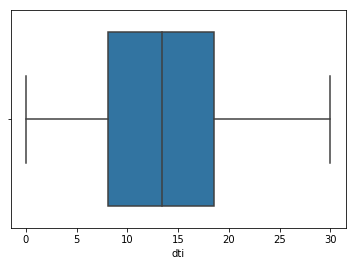

<Figure size 1296x720 with 0 Axes>

inq_last_6mths


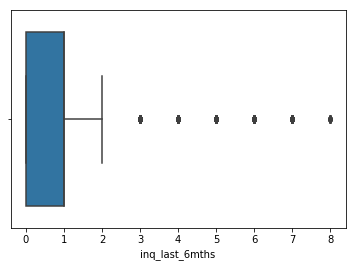

<Figure size 1296x720 with 0 Axes>

open_acc


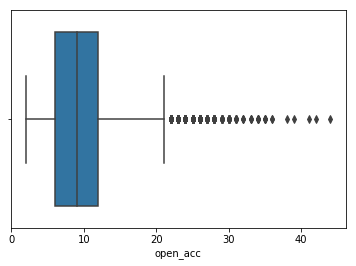

<Figure size 1296x720 with 0 Axes>

revol_bal


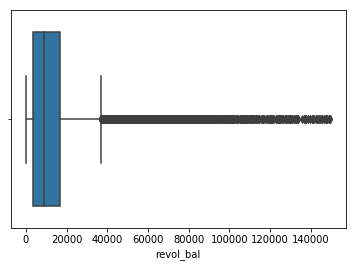

<Figure size 1296x720 with 0 Axes>

total_acc


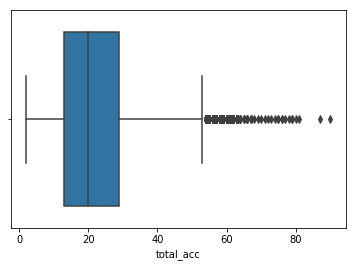

<Figure size 1296x720 with 0 Axes>

out_prncp


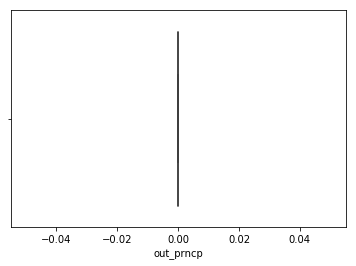

<Figure size 1296x720 with 0 Axes>

out_prncp_inv


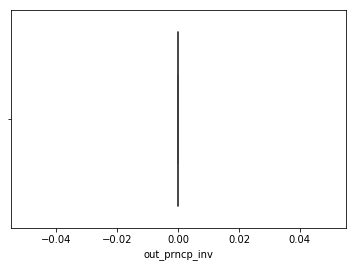

<Figure size 1296x720 with 0 Axes>

total_pymnt


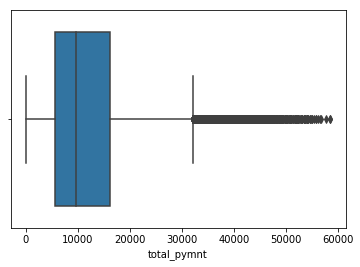

<Figure size 1296x720 with 0 Axes>

total_pymnt_inv


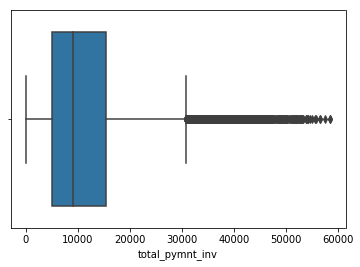

<Figure size 1296x720 with 0 Axes>

total_rec_prncp


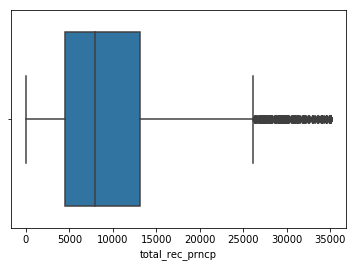

<Figure size 1296x720 with 0 Axes>

total_rec_int


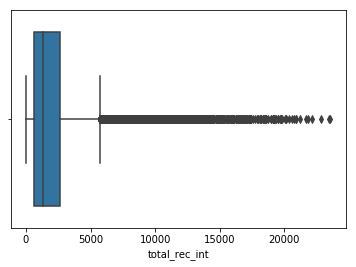

<Figure size 1296x720 with 0 Axes>

total_rec_late_fee


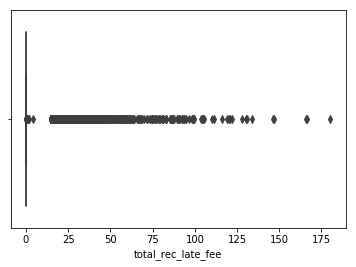

<Figure size 1296x720 with 0 Axes>

recoveries


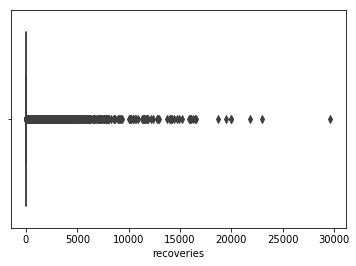

<Figure size 1296x720 with 0 Axes>

collection_recovery_fee


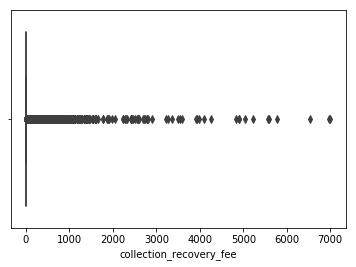

<Figure size 1296x720 with 0 Axes>

last_pymnt_amnt


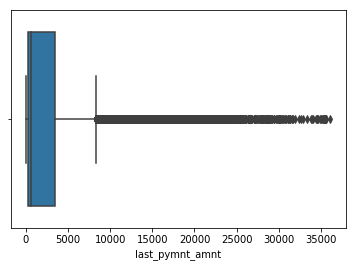

<Figure size 1296x720 with 0 Axes>

In [6]:
for i in cont_col:
    sns.boxplot(df2[i])
    print(i)
    plt.figure(figsize=(18,10))
    plt.show()

In [7]:
df['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

#### Outlier treatment

In [8]:
for i in cont_col:
    q1=df2[i].quantile(0.25) 
    q3=df2[i].quantile(0.75) 
    ub=q3+1.5*(q3-q1) #lower bound limit
    lb=q1-1.5*(q3-q1) # upper bound limit
    df2[i]=np.where(df2[i]>ub,ub,df2[i])##capping--> bring maximum figures to upper bound limit
    df2[i]=np.where(df2[i]<lb,lb,df2[i])##flooring--> bring minimum figures to lower bound limit

loan_amnt


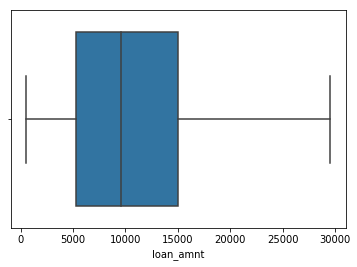

<Figure size 1296x720 with 0 Axes>

funded_amnt


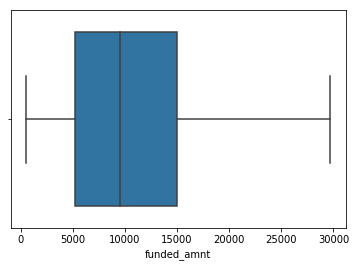

<Figure size 1296x720 with 0 Axes>

funded_amnt_inv


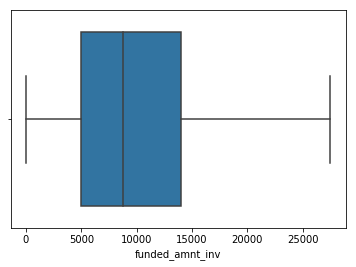

<Figure size 1296x720 with 0 Axes>

installment


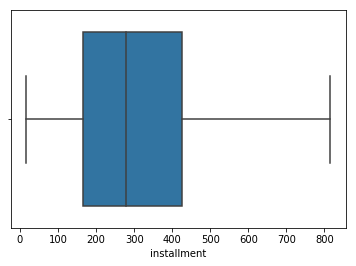

<Figure size 1296x720 with 0 Axes>

annual_inc


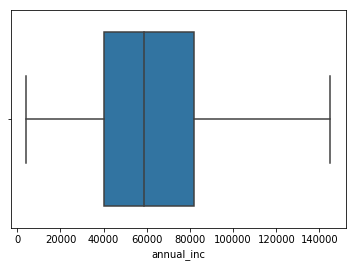

<Figure size 1296x720 with 0 Axes>

dti


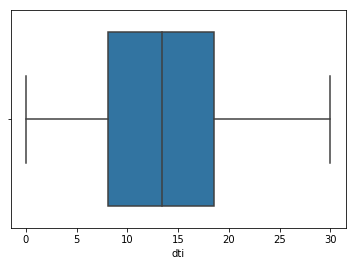

<Figure size 1296x720 with 0 Axes>

inq_last_6mths


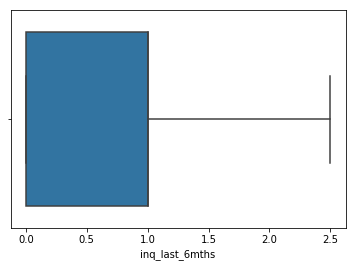

<Figure size 1296x720 with 0 Axes>

open_acc


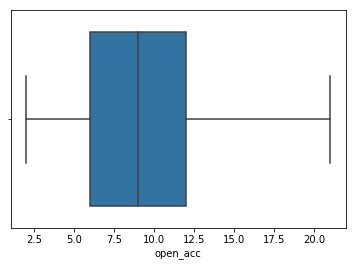

<Figure size 1296x720 with 0 Axes>

revol_bal


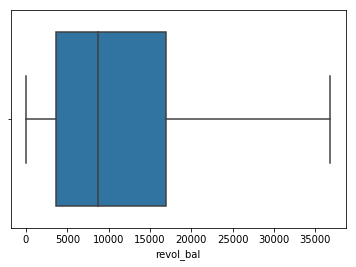

<Figure size 1296x720 with 0 Axes>

total_acc


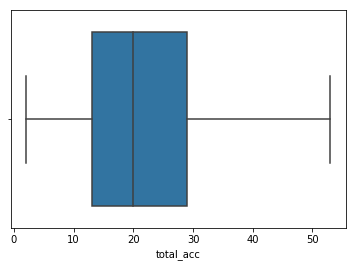

<Figure size 1296x720 with 0 Axes>

out_prncp


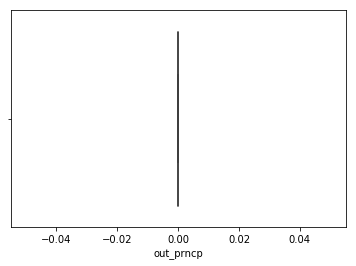

<Figure size 1296x720 with 0 Axes>

out_prncp_inv


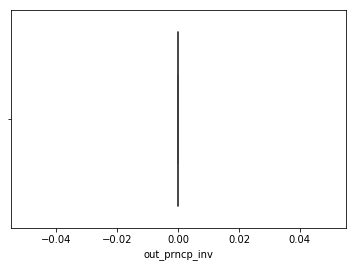

<Figure size 1296x720 with 0 Axes>

total_pymnt


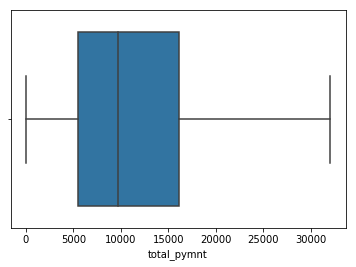

<Figure size 1296x720 with 0 Axes>

total_pymnt_inv


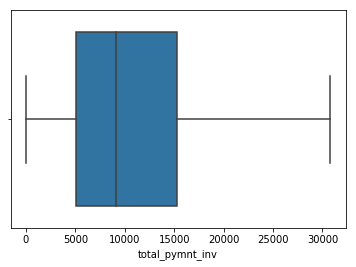

<Figure size 1296x720 with 0 Axes>

total_rec_prncp


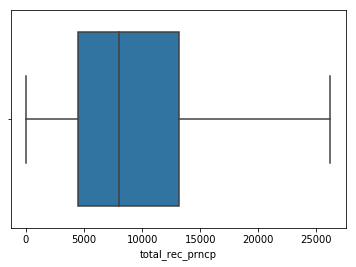

<Figure size 1296x720 with 0 Axes>

total_rec_int


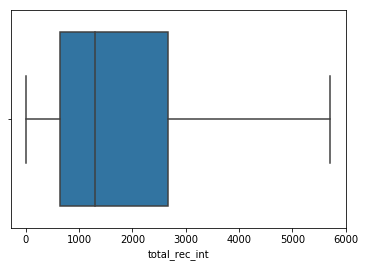

<Figure size 1296x720 with 0 Axes>

total_rec_late_fee


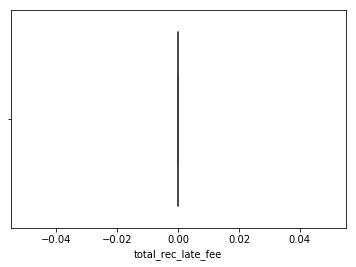

<Figure size 1296x720 with 0 Axes>

recoveries


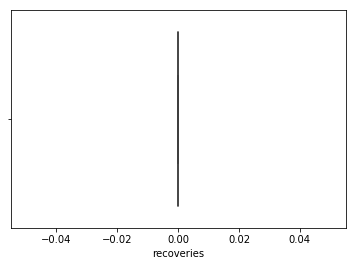

<Figure size 1296x720 with 0 Axes>

collection_recovery_fee


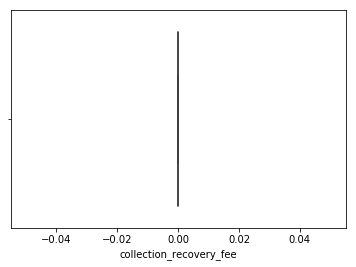

<Figure size 1296x720 with 0 Axes>

last_pymnt_amnt


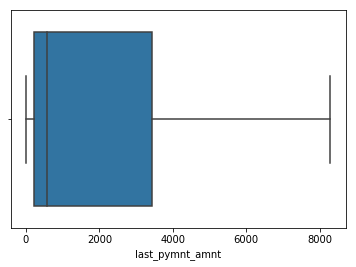

<Figure size 1296x720 with 0 Axes>

In [9]:
for i in cont_col:
    sns.boxplot(df2[i])
    print(i)
    plt.figure(figsize=(18,10))
    plt.show()

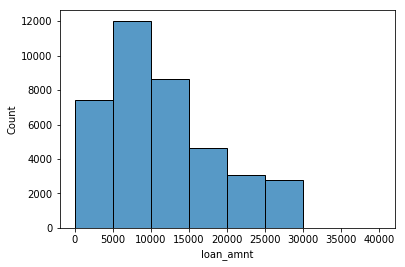

In [11]:
#Checking loan amount distribution 
sns.histplot(df2["loan_amnt"],bins=[0,5000,10000,15000,20000,25000,30000,35000,40000])

### Derived Metrics calulcation

In [12]:
#Loan amont are buceted in range of 5000 Rs.
bins = [0,5000,10000,15000,20000,25000,30000,35000] #Creating bins of requested loan amount
df2['loanamnt']=pd.cut(df2['loan_amnt'],bins)

#Bins created for Debt to Income ratio in size of 2
bins_dti=np.arange(0,32,2)
df2['dti_bin']=pd.cut(df2['dti'],bins_dti)
df2['dti_bin']

#Bins for interest rates are created by cleaning the data
df2['intrate']=df2['int_rate'].str.replace('%','').astype(float)
df2['intrate'].describe()
bins_intrate=np.arange(5,25,1)
df2['intrate_bin']=pd.cut(df2['intrate'],bins_intrate)

#zip_code column cleaning and binning
df2['zipcode']=df2['zip_code'].str.replace('xx','').astype(int)
bins_zpcod=np.arange(0,1000,10)
df2['zpcod_bin']=pd.cut(df2['zipcode'],bins_zpcod)

### Higher loan amounts add to higher charged off rates

Text(0,0.5,'% Deafaulters')

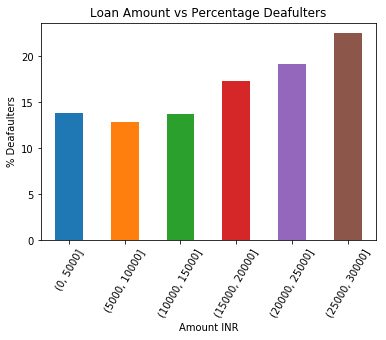

In [13]:
q=pd.DataFrame(df2.pivot_table(index= 'loanamnt', columns= 'loan_status', 
                               values='id', aggfunc={'id':'count'})) #Creating pivot of binned loan amount vs loan status

#perc_defaulters shows the tendency of default rate(percentage of deafulters in that goup) in that particular bin
q['perc_defaulters']=q['Charged Off']/(q['Charged Off']+q['Fully Paid'])*100
fig1=q.perc_defaulters.plot.bar()
plt.xticks(rotation=60)
fig1.set_title('Loan Amount vs Percentage Deafulters')
fig1.set_xlabel('Amount INR')
fig1.set_ylabel('% Deafaulters')

#### Insights
1.The defaulters percentage increases with loan amount

2.Defaulter's percentage highest for loan amount 30000-35000 range 

Recommendation
Higher requested loan amounts shall get more stringent requirments

### Employee title or firm affects loan payment ability?

#### Employee title cleaning
The name mismatching, additional characters in names, additional spcaes or no spaces, upper/lower cases are creating difenrent names. Following code overlooks the small alteration in names, and replaces with single name.
The code takes considerable time for running, hence is commented out, so wold not be run again.

In [14]:
#import time
#a=0
#df2['emp_title'].fillna('NAA', inplace=True)
#t0 = time.time()
#for i in df2['emp_title']:
#   print(i)
#   if (i =='NAA'):
#        break
#        b=a+1
#        for j in df2['emp_title'][a+1:]:
#            print('1')
#            seqMatch = SequenceMatcher(None,i,j)
#            if ((seqMatch.ratio()>0.7) & (0.75<(len(i)/len(j))<1.3)):
#                df2['emp_title'][b]=str(i)
#            elif (seqMatch.ratio()>0.8):
#                df2['emp_title'][b]=str(i)
#        b=b+1
#    a=a+1
#t1 = time.time()
#numpy_time = t1 - t0
#print (t1-t0)
#df2['emp_title'][0:10]

### Employee title or Firm pivot table plotting

In [15]:
#Employee count from particular firm is calculated
empldata=pd.DataFrame(df2.pivot_table(index= 'emp_title', columns= ['loan_status'], values='loan_amnt', aggfunc='count'))

#Loan amount charged of or flly paid, segregated Employee title wise
empl_amnt=pd.DataFrame(df2.pivot_table(index= 'emp_title', columns= 'loan_status', values='loan_amnt', aggfunc='sum'))

#Missing rows and null value treatment
empl_amnt=empl_amnt.dropna()
empldata = empldata.fillna(0)
empldata = empldata.drop('naa')

#Calculating percentage defaulters in every firm
empldata['perc_defaulters']=(empldata['Charged Off']/(empldata['Charged Off']+empldata['Fully Paid'])*100).round(1)
#Calculating percentage amount "charged off" in every firm
empldata['perc_amnt_chargedoff']=(empl_amnt['Charged Off']/empl_amnt['Charged Off'].sum()*100).round(2)
#Calculating percentage amount "fully paid" in every firm
empldata['perc_amnt_fullypaid']=(empl_amnt['Fully Paid']/empl_amnt['Fully Paid'].sum()*100).round(2)
#Calculating percentage loss to gain in every firm
empldata['loss2revenue_ratio']=(empldata['perc_amnt_chargedoff']/empldata['perc_amnt_fullypaid']).round(2)

#Data considering with defaulter count in firm more than or equal to 10,others ignored in this analysis
empldata=empldata[empldata['Charged Off']>=10] 
g=empldata.sort_values('loss2revenue_ratio', ascending=False) #Sorting with high loss to gain ratio
g

loan_status,Charged Off,Fully Paid,perc_defaulters,perc_amnt_chargedoff,perc_amnt_fullypaid,loss2revenue_ratio
emp_title,,,,,,
wal-mart,30.0,85.0,26.1,0.73,0.43,1.70
postal service,13.0,49.0,21.0,0.46,0.37,1.24
va medical center,10.0,42.0,19.2,0.33,0.29,1.14
ups,19.0,75.0,20.2,0.72,0.63,1.14
self employed,19.0,80.0,19.2,0.50,0.52,0.96
united states postal service,27.0,113.0,19.3,0.75,0.82,0.91
central school district 301,10.0,45.0,18.2,0.27,0.30,0.90
at&t,17.0,68.0,20.0,0.50,0.56,0.89
cox communications,24.0,104.0,18.8,0.79,0.89,0.89


#### Insights
1.Certain firms have higher rate of defaulters

2.Top mentions in above list has highest rate of defaulters

Recommendation: The top  firms in list with high loss2revenue ratio as well high perc_defaulters or Charged Off count shall be on radar for debt repayments.
And caution must be taken while lending money to these firms applicants, maybe guarantor within firm can be helpful.

### Do certain locality borrowers show tendency to be defaulter?
We will see if zipcode has any co-relation with charged off counts/sum

Text(0,0.5,'% Fully Paid Ratio or Revenue contribution by zip')

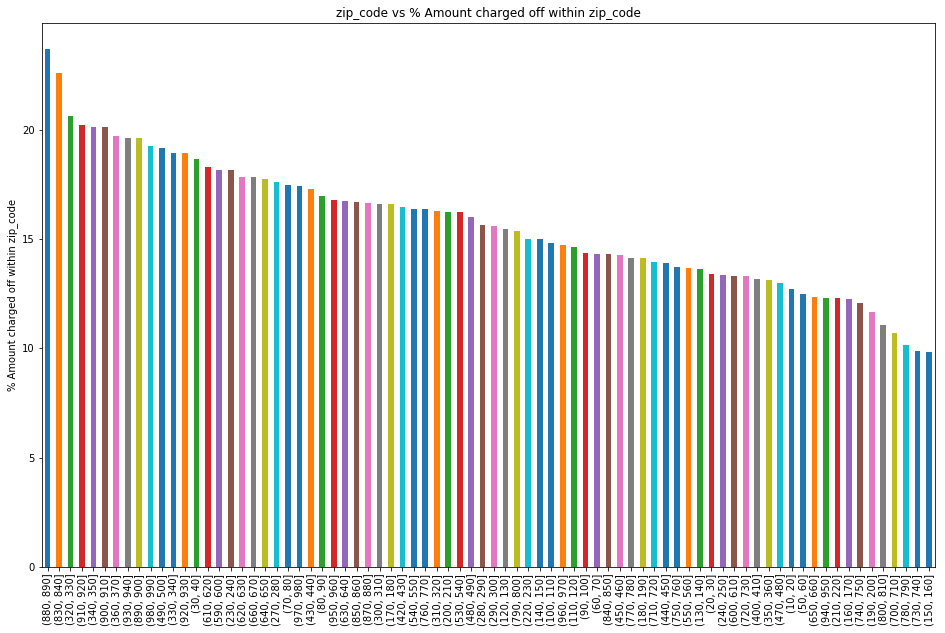

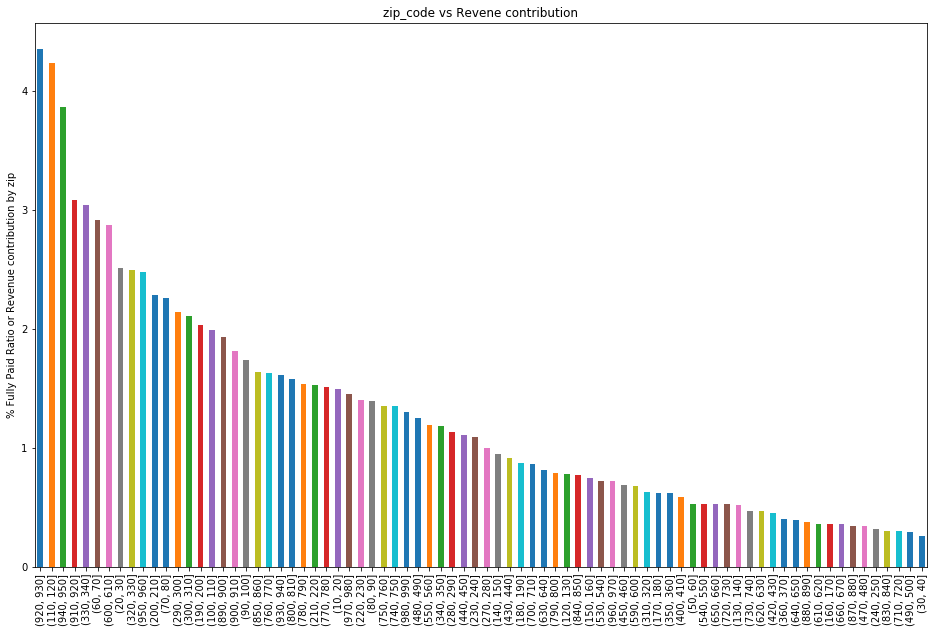

In [16]:
#Creating co-relation table/ pivot table between binned zip codes & loan status
zpcd=pd.DataFrame(df2.pivot_table(index= 'zpcod_bin', columns= 'loan_status', values=['loan_amnt', 'id'], 
                                  aggfunc={'loan_amnt':np.sum, 'id':'count'}))
#Rearranging column hierarchy
zpcd=zpcd.swaplevel(0,1, axis=1).sort_index(axis=1)
#Percentage defaulted sum in that locality. The zip codes are binned in range of 10, in earlier part of notebook.
zpcd['perc_amnt_chargedoff']=(zpcd['Charged Off']['loan_amnt']
                         /(zpcd['Charged Off']['loan_amnt']+zpcd['Fully Paid']['loan_amnt'])*100).round(2) 
#Considering areas/zip_codes with defaulters more than equal to 15
zpcd=zpcd[zpcd['Charged Off']['id']>=15]

#Sorting higher percentage charged off amounts first and plotting barplot of %Charged of loan amnt vs zip code
zpcd_sorted=zpcd.sort_values('perc_amnt_chargedoff', ascending=False)
plt.figure(figsize=(16,10))
fig3 = zpcd_sorted.perc_amnt_chargedoff.plot(kind='bar')
fig3.set_title('zip_code vs % Amount charged off within zip_code')
fig3.set_xlabel('')
fig3.set_ylabel('% Amount charged off within zip_code')

#Barplot or zip_code which adds to revnue most
zpcd['fully_paid_per']=(zpcd['Fully Paid']['loan_amnt']/(zpcd['Fully Paid']['loan_amnt'].sum())*100).round(2)
zpcd_sorted=zpcd.sort_values('fully_paid_per', ascending=False)
plt.figure(figsize=(16,10))
fig4 = zpcd_sorted.fully_paid_per.plot(kind='bar')
fig4.set_title('zip_code vs Revene contribution')
fig4.set_xlabel('')
fig4.set_ylabel('% Fully Paid Ratio or Revenue contribution by zip')

#### Insights
Locality with zip codes 880-890 & 830-840 show higher deafulters rate.
These localaties can be traced for revenue generations as well
Recommendation: Additional external data set for poverty situation, crime rate, population & buisnesses to be studied for loan schemes

### Effect of higher interest rates on charged off numbers
Following check is to look for co-relation between binned interest rate vs count of charged off loan categories

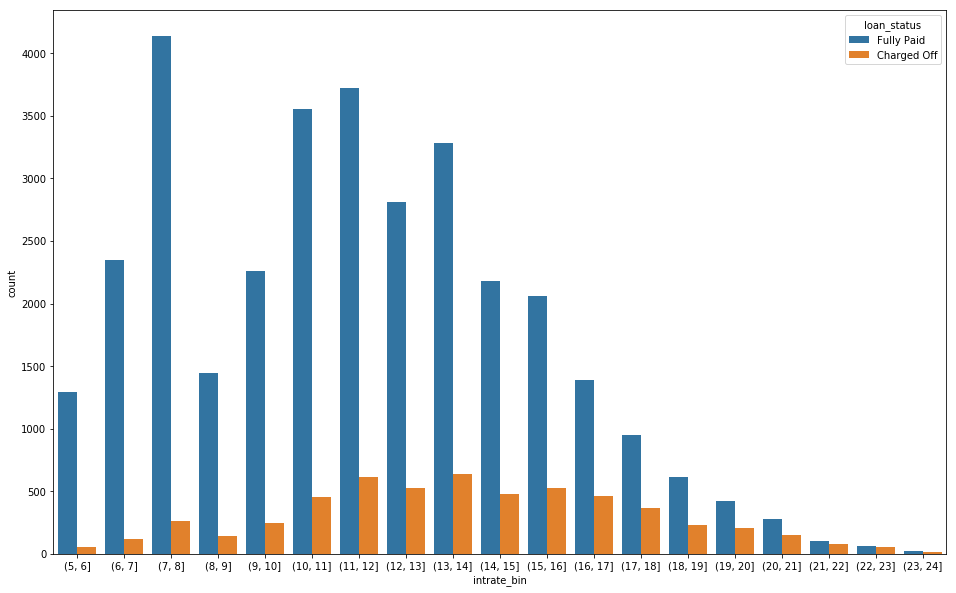

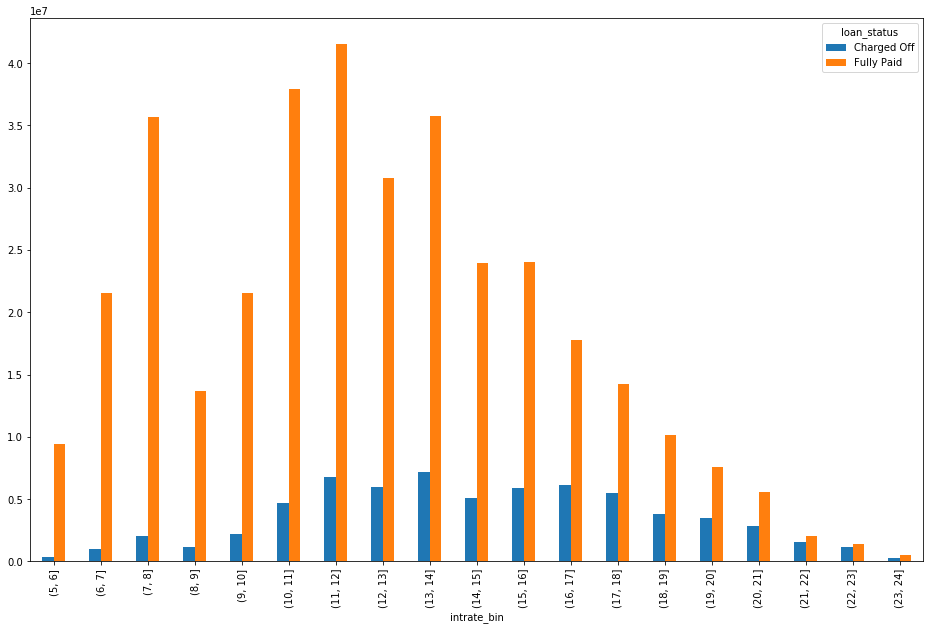

In [17]:
#Creating pivot table with interest rates bins, loan status with loan amount sm as values
intrate=pd.DataFrame(df2.pivot_table(index= ['intrate_bin'], columns= 'loan_status', values='loan_amnt', aggfunc='sum'))
plt.figure(figsize=(16,10))
sns.countplot(df2['intrate_bin'],hue=df2["loan_status"])
intrate.plot(kind='bar',figsize=(16,10))

### Analysing with Purpose of the loan requests 

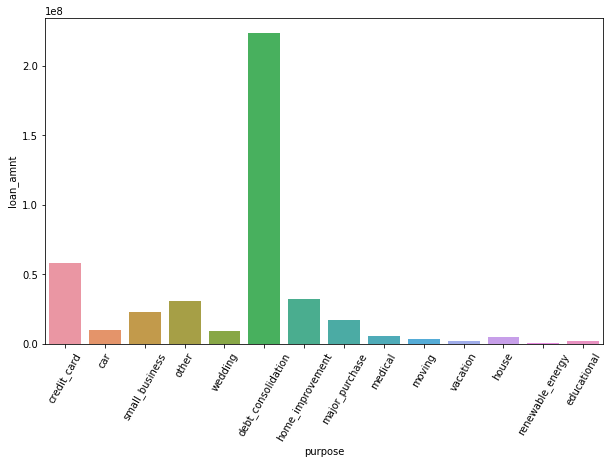

In [19]:
#Plot of prpose vs loan amount.
plt.figure(figsize=(10,6))
plt.xticks(rotation=60)
sns.barplot(x=df2["purpose"],y=df2["loan_amnt"],estimator=np.sum,ci=None)

#### Insights
Debt consolidation is one of the hihest loan amount requesting purpose. It make sense to have insights within this purpose

The plot shows, Some purposes seen very common given by loan applicants, such as "Debt Consolidation". So it was decided to further analayse this purpose together with employee length, income, installment & home ownership.

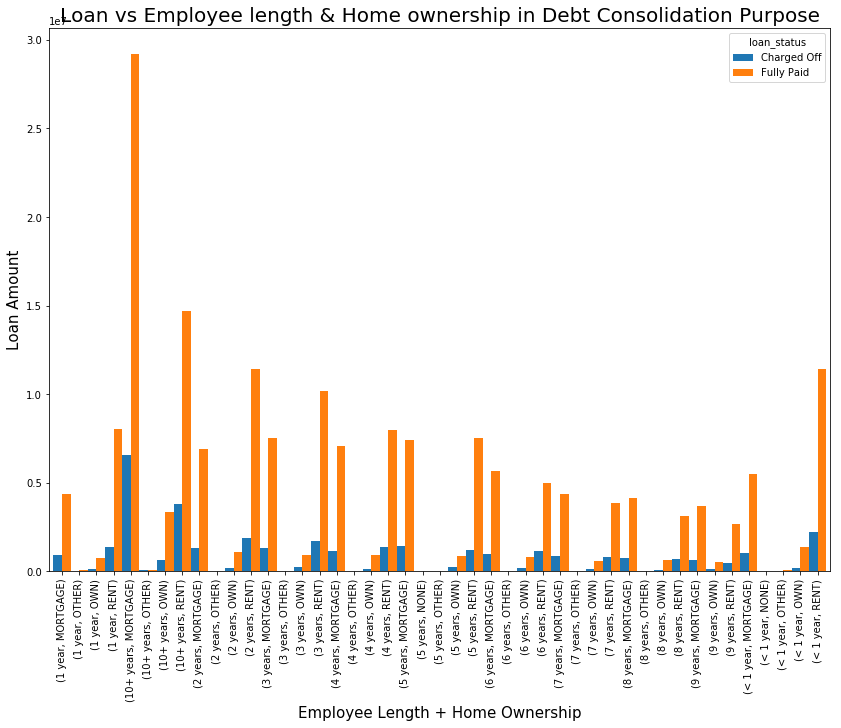

In [20]:
#Creation of pivot table for applicants proessional & personal details along with loan details
emplenth_income_inst=pd.DataFrame(df2.pivot_table(index= ['emp_length','home_ownership'],  
                                                  columns= ['purpose','loan_status'], 
                                                  values=['id','annual_inc','loan_amnt','installment'], 
                                    aggfunc={'id':'count','annual_inc':np.mean,'loan_amnt':np.sum,'installment':np.mean,}))
emplenth_income_inst=emplenth_income_inst.swaplevel(0,1, axis=1).sort_index(axis=1)
emplenth_income_inst['debt_consolidation']['loan_amnt'].plot(kind='bar', figsize=(14,10),width=1)
plt.xlabel('Employee Length + Home Ownership', fontsize = 15)
plt.ylabel('Loan Amount', fontsize = 15)
plt.title('Loan vs Employee length & Home ownership in Debt Consolidation Purpose',fontsize = 20)
plt.show()

Insights:From above plot in general seen that applicants with home as "Mortgage" or as "Rent", have higher count. In that the charged of amount is higher comparatively in <1year  10+year applicants. So we will further deep dive into those applicants.

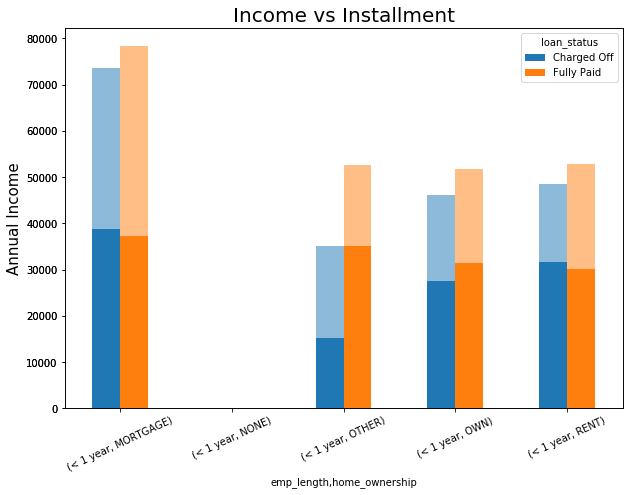

In [21]:
#Sperimposing plot of "annual_income" on "Installment" for employee length <1year & 10+year
from io import StringIO
fig, ax = plt.subplots()
ax2 = ax.twiny()

#Creating plot for installment for <1year aapplicants
col1 = emplenth_income_inst['debt_consolidation']['installment'].iloc[40:45]*100 #100 factor is multiplied to installment to seen on superimposed plot
col1.plot(kind='bar', ax=ax,figsize=(10, 7),rot=25)
#Creating plot for annual income for <1year aapplicants
col2 = emplenth_income_inst['debt_consolidation']['annual_inc'].iloc[40:45]
#superimposing installment & annual income
col2.plot(kind='bar', ax=ax2, alpha=0.5, legend=False,figsize=(10, 7))
ax2.xaxis.set_visible(False)
plt.xlabel('Employee Length + Home Ownership', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)
plt.title('Income vs Installment',fontsize = 20)
plt.show()

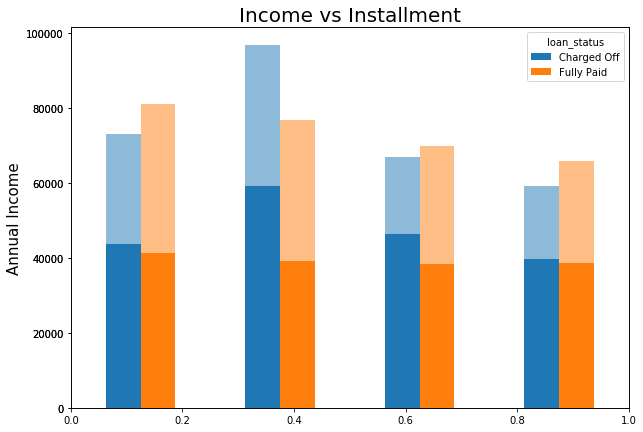

In [22]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
#Creating plot for installment for 10+year aapplicants
col3 = emplenth_income_inst['debt_consolidation']['installment'].iloc[4:8]*100 #100 factor is multiplied to installment to seen on superimposed plot
col3.plot(kind='bar', ax=ax2,figsize=(10, 7),rot=25)
#Creating plot for annual income for 10+year aapplicants
col4 = emplenth_income_inst['debt_consolidation']['annual_inc'].iloc[4:8]
#superimposing installment & annual income
col4.plot(kind='bar', ax=ax2, alpha=0.5, legend=False,figsize=(10, 7))
ax2.xaxis.set_visible(False)
plt.xlabel('Employee Length + Home Ownership', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)
plt.title('Income vs Installment',fontsize = 20)
plt.show()

#### Debt to Income ratio is reflected in Charged Off rate

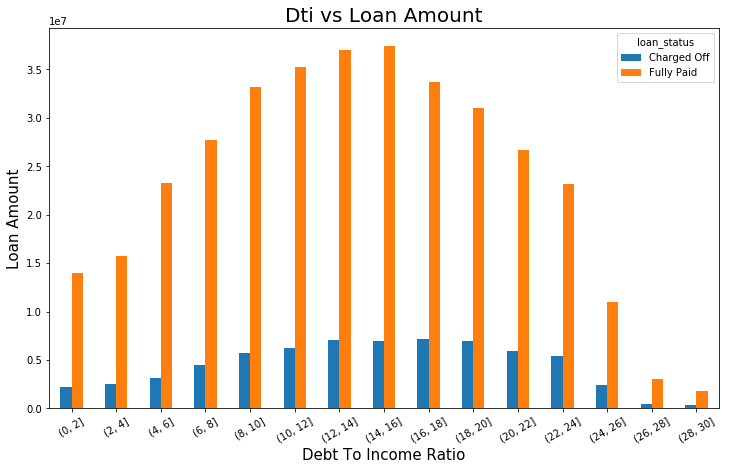

In [24]:
#Creating pivot table of for binned valuse of DTI and loan status
dticheck=pd.DataFrame(df2.pivot_table(index= ['dti_bin'], columns= 'loan_status', values='loan_amnt', aggfunc='sum'))
dticheck.plot(kind='bar',figsize=(12, 7), rot=30)
plt.xlabel('Debt To Income Ratio', fontsize = 15)
plt.ylabel('Loan Amount', fontsize = 15)
plt.title('Dti vs Loan Amount',fontsize = 20)
plt.show()

#### Insights
Debt to income ratio shows incoming and outgoing of liquidity of applicant. It can be treated as balance sheet of company. Higher income lower debt means lower dti
Lower dti applicants have smooth ratio of repayment. Higher dti applicants more tend to be deafulters.
Recommendation: Loan amount funding, installment amount, tenure can be linked to dti, to keep dti ratio within limit.